# Week 2: Exploring the U.S. Census, part 1 (population data)

In [1]:
!pip install -q census us

In [2]:
%config InlineBackend.figure_formats = ["svg"]

import matplotlib.pyplot as plt
import pandas as pd

from census import Census
from us import states

In [3]:
census = Census("", year=2020)

## Census datasets
* [Census API wrapper documentation](https://github.com/datamade/census)

## Decennial / PL 94-171 data

Column definitions are available in the [PL 94-171 documentation](https://api.census.gov/data/2020/dec/pl/variables.html).

In [4]:
population_columns = {
    "P1_003N": "white",	      # White alone
    "P1_004N": "black",	      # Black or African American alone
    "P1_005N": "amin",        # American Indian and Alaska Native alone
    "P1_006N": "asian",       # Asian alone
    "P1_007N": "nhpi",        # Native Hawaiian and Other Pacific Islander alone
    "P1_008N": "other",       # Some Other Race alone
    "P1_009N": "two_or_more", # Two or more races
}

In [5]:
state = states.NY

In [6]:
county_populations = census.pl.get(
    ("NAME", *population_columns),
    geo={
        "for": "county:*",
        "in": f"state:{state.fips}",
    }
)

In [7]:
county_populations[0]

{'NAME': 'Allegany County, New York',
 'P1_003N': 42555.0,
 'P1_004N': 829.0,
 'P1_005N': 91.0,
 'P1_006N': 379.0,
 'P1_007N': 9.0,
 'P1_008N': 678.0,
 'P1_009N': 1915.0,
 'state': '36',
 'county': '003'}

In [8]:
county_df = pd.DataFrame(county_populations)

In [9]:
county_df.head(5)

,NAME,P1_003N,P1_004N,P1_005N,P1_006N,P1_007N,P1_008N,P1_009N,state,county
0,"Allegany County, New York",42555.0,829.0,91.0,379.0,9.0,678.0,1915.0,36,003
1,"Cattaraugus County, New York",68128.0,1043.0,2706.0,567.0,14.0,571.0,4013.0,36,009
2,"Chemung County, New York",70463.0,5315.0,240.0,1432.0,15.0,947.0,5736.0,36,015
3,"Columbia County, New York",51533.0,2557.0,188.0,1431.0,21.0,1584.0,4256.0,36,021
4,"Dutchess County, New York",207251.0,32289.0,1312.0,10781.0,74.0,18380.0,25824.0,36,027


In [10]:
county_df = county_df.rename(
    columns={"NAME": "name", **population_columns}
).drop(
    columns=["state", "county"]
).set_index("name")

In [11]:
county_df.head(5)

,white,black,amin,asian,nhpi,other,two_or_more
name,,,,,,,
"Allegany County, New York",42555.0,829.0,91.0,379.0,9.0,678.0,1915.0
"Cattaraugus County, New York",68128.0,1043.0,2706.0,567.0,14.0,571.0,4013.0
"Chemung County, New York",70463.0,5315.0,240.0,1432.0,15.0,947.0,5736.0
"Columbia County, New York",51533.0,2557.0,188.0,1431.0,21.0,1584.0,4256.0
"Dutchess County, New York",207251.0,32289.0,1312.0,10781.0,74.0,18380.0,25824.0


In [12]:
county_df.sum(axis=0)

white          11143349.0
black           2986172.0
amin             149690.0
asian           1933127.0
nhpi              10815.0
other           2210633.0
two_or_more     1767463.0
dtype: float64

In [13]:
county_df.sum(axis=1)

name
Allegany County, New York         46456.0
Cattaraugus County, New York      77042.0
Chemung County, New York          84148.0
Columbia County, New York         61570.0
Dutchess County, New York        295911.0
                                  ...    
Washington County, New York       61302.0
Wayne County, New York            91283.0
Westchester County, New York    1004457.0
Wyoming County, New York          40531.0
Yates County, New York            24774.0
Length: 62, dtype: float64

In [14]:
county_df["total"] = county_df.sum(axis=1)

In [15]:
county_df.head(5)

,white,black,amin,asian,nhpi,other,two_or_more,total
name,,,,,,,,
"Allegany County, New York",42555.0,829.0,91.0,379.0,9.0,678.0,1915.0,46456.0
"Cattaraugus County, New York",68128.0,1043.0,2706.0,567.0,14.0,571.0,4013.0,77042.0
"Chemung County, New York",70463.0,5315.0,240.0,1432.0,15.0,947.0,5736.0,84148.0
"Columbia County, New York",51533.0,2557.0,188.0,1431.0,21.0,1584.0,4256.0,61570.0
"Dutchess County, New York",207251.0,32289.0,1312.0,10781.0,74.0,18380.0,25824.0,295911.0


In [16]:
categories = list(population_columns.values())
categories

['white', 'black', 'amin', 'asian', 'nhpi', 'other', 'two_or_more']

<AxesSubplot:ylabel='Tompkins County, New York'>

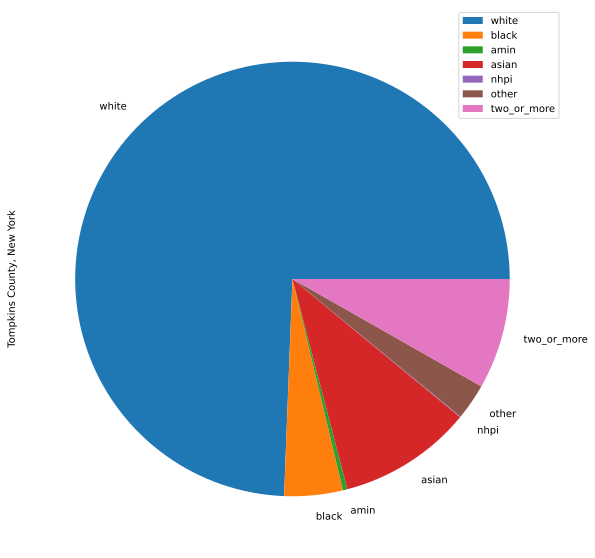

In [24]:
county_df[categories].T.plot.pie(y="Tompkins County, New York", figsize=(10, 10))

In [19]:
for col in categories:
    county_df[f"{col}_pct"] = 100 * county_df[col] / county_df["total"]

In [20]:
county_df

,white,black,amin,asian,nhpi,other,two_or_more,total,white_pct,black_pct,amin_pct,asian_pct,nhpi_pct,other_pct,two_or_more_pct
name,,,,,,,,,,,,,,,
"Allegany County, New York",42555.0,829.0,91.0,379.0,9.0,678.0,1915.0,46456.0,91.602807,1.784484,0.195884,0.815826,0.019373,1.459445,4.122180
"Cattaraugus County, New York",68128.0,1043.0,2706.0,567.0,14.0,571.0,4013.0,77042.0,88.429688,1.353807,3.512370,0.735962,0.018172,0.741154,5.208847
"Chemung County, New York",70463.0,5315.0,240.0,1432.0,15.0,947.0,5736.0,84148.0,83.736987,6.316252,0.285212,1.701764,0.017826,1.125398,6.816561
"Columbia County, New York",51533.0,2557.0,188.0,1431.0,21.0,1584.0,4256.0,61570.0,83.698230,4.152997,0.305344,2.324184,0.034108,2.572682,6.912457
"Dutchess County, New York",207251.0,32289.0,1312.0,10781.0,74.0,18380.0,25824.0,295911.0,70.038289,10.911727,0.443377,3.643325,0.025008,6.211327,8.726948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Washington County, New York",55162.0,1715.0,174.0,326.0,23.0,703.0,3199.0,61302.0,89.984014,2.797625,0.283841,0.531793,0.037519,1.146782,5.218427
"Wayne County, New York",80476.0,2562.0,263.0,487.0,15.0,1667.0,5813.0,91283.0,88.160994,2.806656,0.288115,0.533506,0.016432,1.826189,6.368108
"Westchester County, New York",533150.0,141094.0,7466.0,65707.0,339.0,146911.0,109790.0,1004457.0,53.078429,14.046793,0.743287,6.541544,0.033750,14.625912,10.930284


In [21]:
county_df.sort_values(by=["total"])

,white,black,amin,asian,nhpi,other,two_or_more,total,white_pct,black_pct,amin_pct,asian_pct,nhpi_pct,other_pct,two_or_more_pct
name,,,,,,,,,,,,,,,
"Hamilton County, New York",4785.0,31.0,14.0,12.0,1.0,22.0,242.0,5107.0,93.694929,0.607010,0.274134,0.234972,0.019581,0.430781,4.738594
"Schuyler County, New York",16750.0,101.0,50.0,108.0,1.0,93.0,795.0,17898.0,93.585876,0.564309,0.279361,0.603419,0.005587,0.519611,4.441837
"Yates County, New York",23264.0,161.0,49.0,93.0,10.0,250.0,947.0,24774.0,93.904900,0.649875,0.197788,0.375394,0.040365,1.009122,3.822556
"Lewis County, New York",25121.0,109.0,57.0,76.0,11.0,184.0,1024.0,26582.0,94.503800,0.410052,0.214431,0.285908,0.041381,0.692198,3.852231
"Schoharie County, New York",27112.0,305.0,83.0,211.0,3.0,304.0,1696.0,29714.0,91.243185,1.026452,0.279330,0.710103,0.010096,1.023087,5.707747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Bronx County, New York",207573.0,487118.0,21539.0,69559.0,1640.0,493052.0,192173.0,1472654.0,14.095164,33.077559,1.462597,4.723377,0.111364,33.480505,13.049433
"Suffolk County, New York",1022846.0,114294.0,9188.0,65779.0,427.0,166174.0,147212.0,1525920.0,67.031430,7.490170,0.602129,4.310776,0.027983,10.890086,9.647426
"New York County, New York",847604.0,229361.0,9969.0,221995.0,1795.0,208086.0,175441.0,1694251.0,50.028243,13.537605,0.588402,13.102840,0.105947,12.281887,10.355077


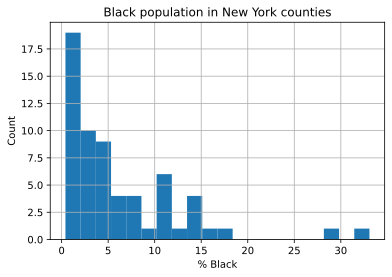

In [26]:
ax = county_df["black_pct"].hist(bins=20)
ax.set_xlabel("% Black")
ax.set_ylabel("Count")
ax.set_title("Black population in New York counties")
plt.show()

* load P2 data here:
    * pie chart for non-Hispanic + Hispanic pie wedge (not broken down further)
    * pie chart for race breakdown among Hispanic _only_

## Exercise: drilling down

## Homework
2010 -> 2020 change?